# Novelty detection

The training data is not polluted by outliers and we are interested in detecting whether a new observation is an outlier. In this context an outlier is also called a novelty.

- [2.7. Novelty and Outlier Detection](https://scikit-learn.org/stable/modules/outlier_detection.html)  
- [One-class SVM with non-linear kernel (RBF)](https://scikit-learn.org/stable/auto_examples/svm/plot_oneclass.html#sphx-glr-auto-examples-svm-plot-oneclass-py)  
- [One Class SVM for Anomaly Detection | Unsupervised Machine Learning](https://www.youtube.com/watch?v=0IkFnHpUUjE&ab_channel=GrabNGoInfo)

In [8]:
import pandas as pd
import numpy as np
import random as rd
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
import matplotlib.pyplot as plt

import utils

## Base Line

When training the model we have to specify the percentage of defective individuals in the population (nu). We know that this ratio is approximatly equal to 0.008.

In [2]:
# Load data
train_input, train_output = utils.loadTrainingData(remove_id=True, remove_capuchon_insertion=True)
X_train, X_test, y_train, y_test = train_test_split(train_input, train_output, test_size = 0.3, random_state = 42)

# Create model
clf = svm.OneClassSVM(nu=0.008, kernel="rbf", gamma="auto")
clf.fit(X_train)

# Prediction
y_pred = clf.predict(X_test)
y_pred = [1 if i==-1 else 0 for i in y_pred]

# Evaluation
metrics.accuracy_score(y_test, y_pred)

0.04567841622404636

In [9]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 384 9879]
 [   3   89]]
              precision    recall  f1-score   support

           0       0.99      0.04      0.07     10263
           1       0.01      0.97      0.02        92

    accuracy                           0.05     10355
   macro avg       0.50      0.50      0.04     10355
weighted avg       0.98      0.05      0.07     10355



<AxesSubplot:>

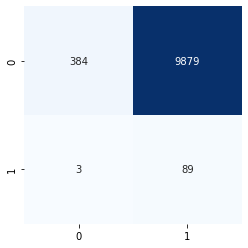

In [13]:
import seaborn as sns
matrix_confusion = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix_confusion, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)

In [14]:
# # Select index
# defect_index = train_output.index[train_output["result"] == 1].tolist()
# valid_index = train_output.index[train_output["result"] == 0].tolist()

# # Separate valide/defective individuals
# train_input_valid = train_input.iloc[valid_index,:]
# train_input_defect = train_input.iloc[defect_index,:]

# # Create training/testing set from valid individuals (80%/20%)
# training_index = np.random.choice(len(valid_index)-1, size=int(0.8*len(valid_index)), replace=False) # 80% training / 20% testing
# testing_index = []
# for i in range(len(valid_index)):
#     if i not in training_index:
#         testing_index.append(i)
# X_train = train_input_valid.iloc[training_index,:]
# X_test = train_input_valid.iloc[testing_index,:]

## Balanced Classes

There is now 50% anomalies in our dataset.

### Removing Individuals

In [16]:
# Load date and balance classes
train_input, train_output = utils.loadTrainingData(remove_id=True, remove_capuchon_insertion=True)
train_input, train_output = utils.balanceClassesByRemoving(train_input, train_output)

# Create model
clf = svm.OneClassSVM(nu=0.5, kernel="rbf", gamma="auto")
clf.fit(X_train)

# Prediction
y_pred = clf.predict(X_test)
y_pred = [1 if i==-1 else 0 for i in y_pred]

# Evaluation
metrics.accuracy_score(y_test, y_pred)

0.047996137131820375

In [17]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 408 9855]
 [   3   89]]
              precision    recall  f1-score   support

           0       0.99      0.04      0.08     10263
           1       0.01      0.97      0.02        92

    accuracy                           0.05     10355
   macro avg       0.50      0.50      0.05     10355
weighted avg       0.98      0.05      0.08     10355



<AxesSubplot:>

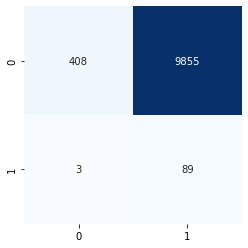

In [18]:
import seaborn as sns
matrix_confusion = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix_confusion, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)

In [20]:
# Get the scores for the testing dataset
score = clf.score_samples(X_test)

# Check the score for x% anomalies
percentage = 50
score_threshold = np.percentile(score, percentage)

# Check the model performance at x% threshold
customized_prediction = [1 if i < score_threshold else 0 for i in score]

# Prediction performance
print(confusion_matrix(y_test, customized_prediction))
print(classification_report(y_test, customized_prediction))

[[5134 5129]
 [  44   48]]
              precision    recall  f1-score   support

           0       0.99      0.50      0.66     10263
           1       0.01      0.52      0.02        92

    accuracy                           0.50     10355
   macro avg       0.50      0.51      0.34     10355
weighted avg       0.98      0.50      0.66     10355

